In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import imblearn
import seaborn as sns

In [ ]:
plt.style.use('fivethirtyeight')
plt.style.available[0]

'Solarize_Light2'

**Reading Dataset*

In [ ]:
df=pd.read_csv('LoanData.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

**Missing Values**

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Filling Categorical Data with mode

In [ ]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

Filling Numerical Data with Median

In [ ]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: ylabel='CoapplicantIncome'>

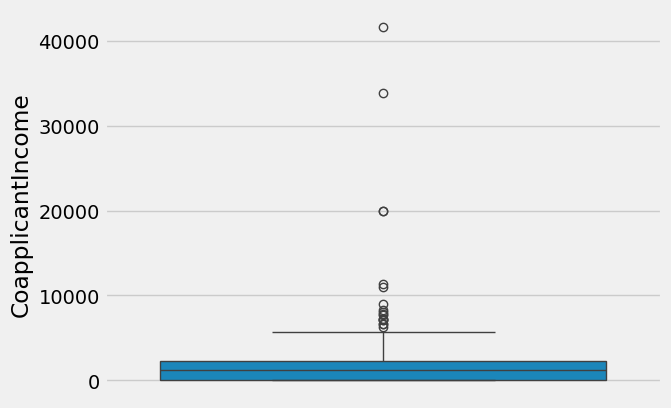

In [ ]:
sns.boxplot(df['CoapplicantIncome'])


<Axes: ylabel='ApplicantIncome'>

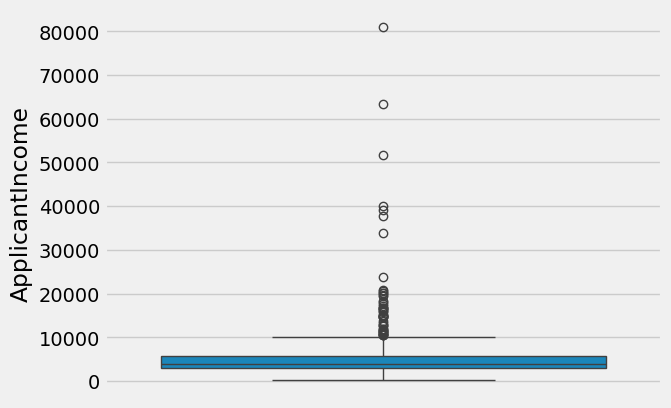

In [ ]:
sns.boxplot(df['ApplicantIncome'])

<Axes: ylabel='LoanAmount'>

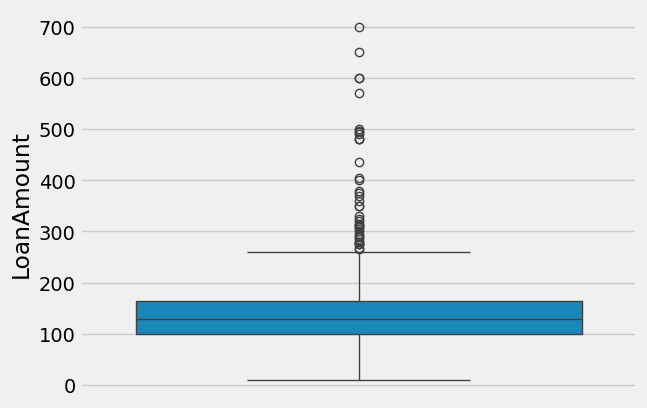

In [ ]:
sns.boxplot(df['LoanAmount'])

In [ ]:
print('before removing outlier',df.shape)

before removing outlier (614, 13)


In [ ]:
df=df[df['ApplicantIncome']<25000]

In [ ]:
print('after removing outlier',df.shape)

after removing outlier (607, 13)


In [ ]:
# similiarly for other column as well
df=df[df['CoapplicantIncome']<10000]
df=df[df['LoanAmount']<400]

In [ ]:
df.shape

(590, 13)

Univariate Data Analysis

<ipython-input-26-dbe2ba894412>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'],color='green')
<ipython-input-26-dbe2ba894412>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'],color='green')
<ipython-input-26-dbe2ba894412>:7: UserWarning: 

`distplo

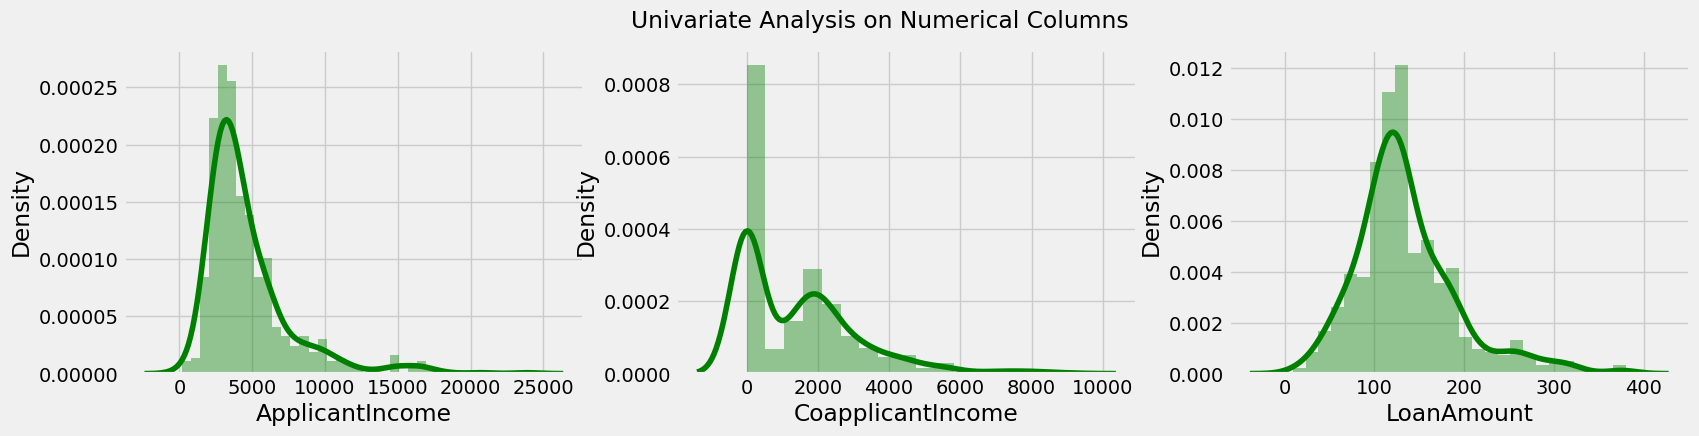

In [ ]:
plt.rcParams['figure.figsize']=(18,4)
plt.subplot(1,3,1)
sns.distplot(df['ApplicantIncome'],color='green')
plt.subplot(1,3,2)
sns.distplot(df['CoapplicantIncome'],color='green')
plt.subplot(1,3,3)
sns.distplot(df['LoanAmount'],color='green')
plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

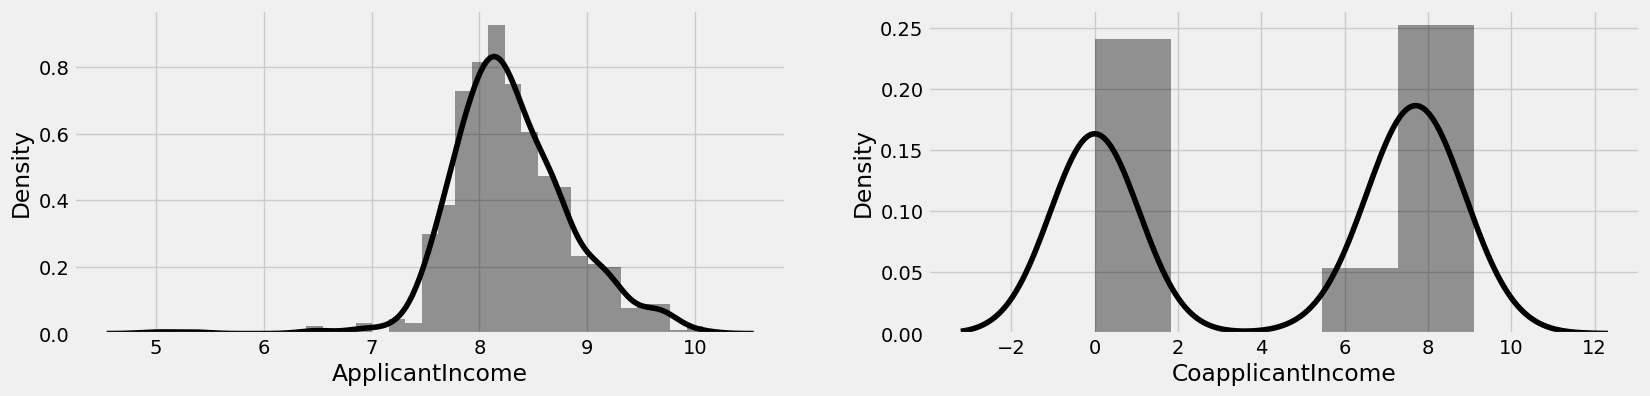

In [ ]:
#Removing Skewness
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(18,4)
# applying log transformation method
df['ApplicantIncome']=np.log(df['ApplicantIncome'])
df['CoapplicantIncome']=np.log1p(df['CoapplicantIncome'])

# checking whether skewness removed or not
plt.subplot(1,2,1)
sns.distplot(df['ApplicantIncome'],color='black')
plt.subplot(1,2,2)
sns.distplot(df['CoapplicantIncome'],color='black')


<Axes: xlabel='count', ylabel='Loan_Status'>

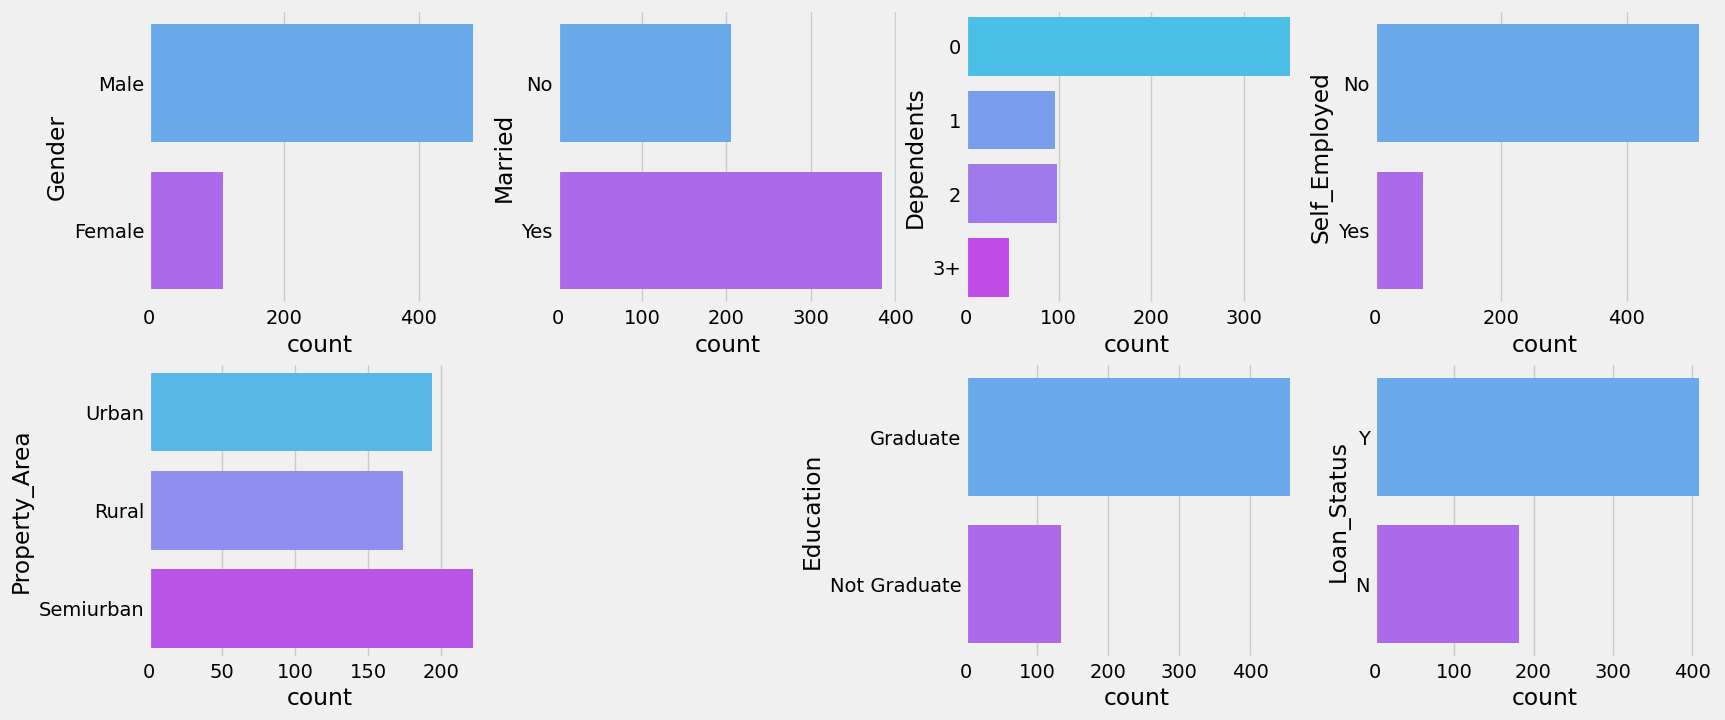

In [ ]:
# Univariate Analysis on Categorical columns
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(2,4,1)
sns.countplot(df['Gender'],palette='cool')
plt.subplot(2,4,2)
sns.countplot(df['Married'],palette='cool')
plt.subplot(2,4,3)
sns.countplot(df['Dependents'],palette='cool')
plt.subplot(2,4,4)
sns.countplot(df['Self_Employed'],palette='cool')
plt.subplot(2,4,5)
#sns.countplot(df['Credit_History'],palette='cool')
#plt.subplot(2,4,6)
sns.countplot(df['Property_Area'],palette='cool')
plt.subplot(2,4,7)
sns.countplot(df['Education'],palette='cool')
plt.subplot(2,4,8)
sns.countplot(df['Loan_Status'],palette='cool')


Bivariate Analysis

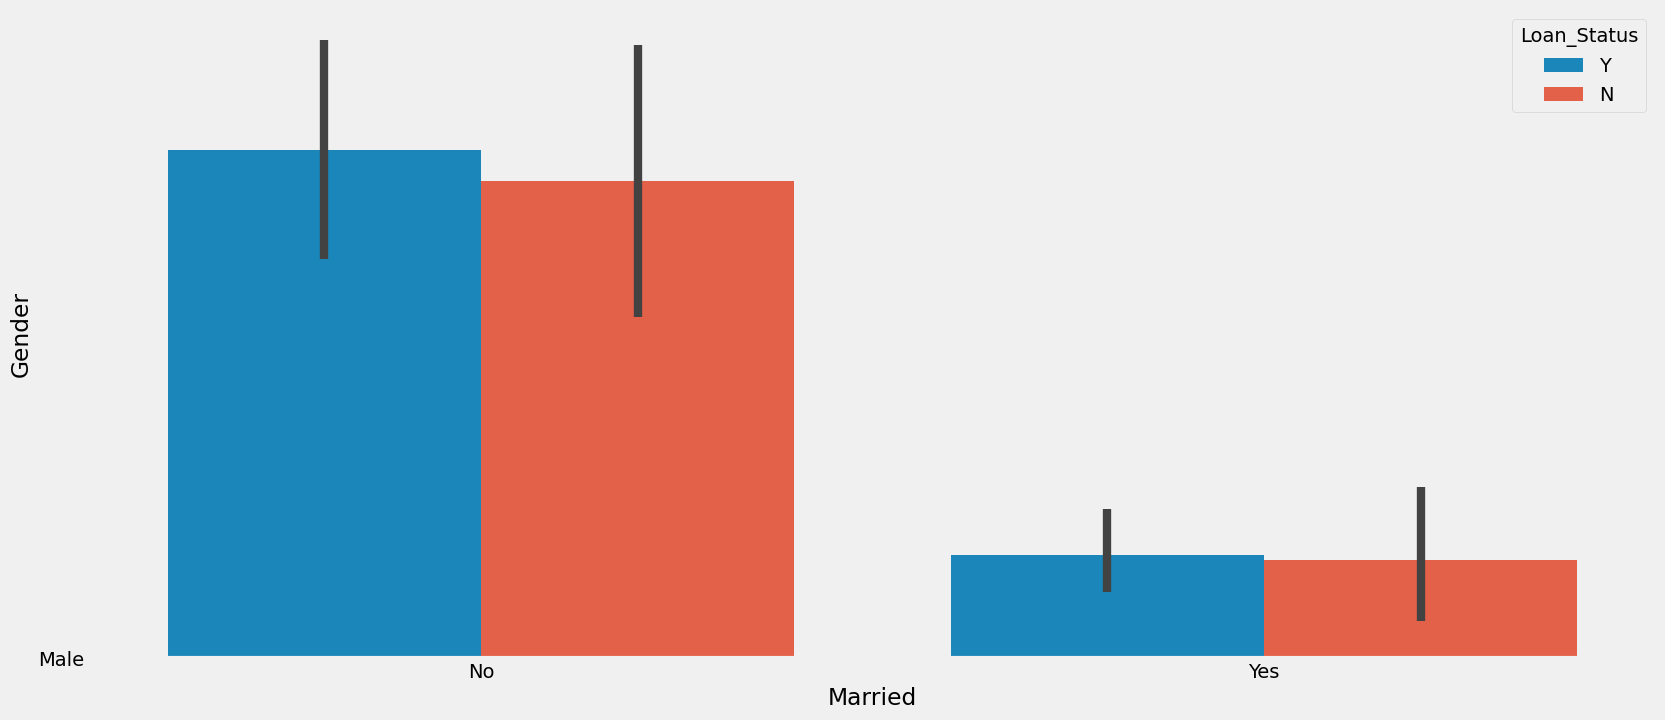

In [ ]:
#sns.barplot(x=df["Gender"],y=df['Married'],hue=df["Loan_Status"])
sns.barplot(y=df["Gender"],x=df['Married'],hue=df["Loan_Status"],data=df)
plt.gca().invert_yaxis()

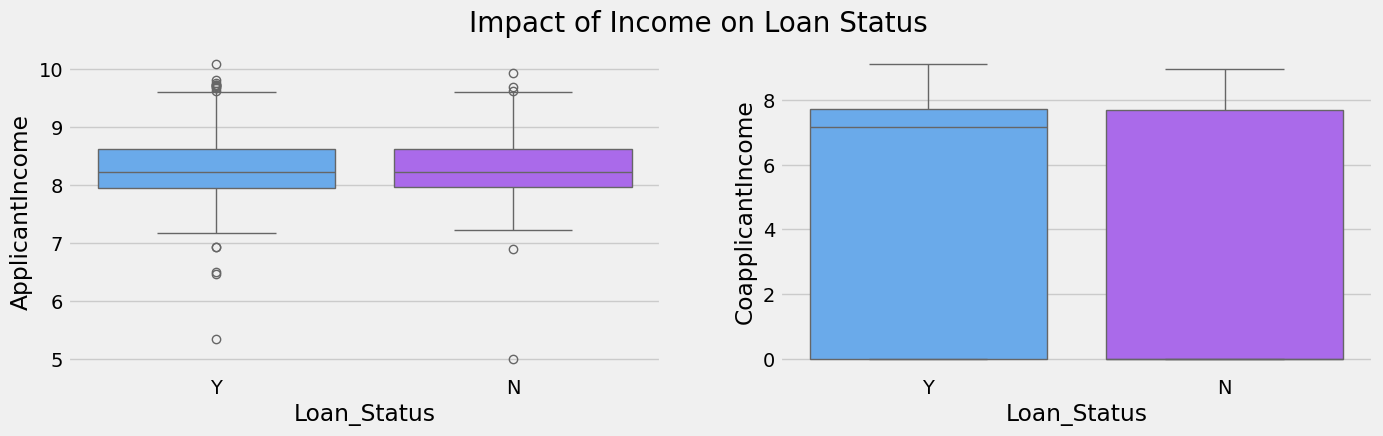

In [ ]:
### Lets check the Impact of Income of Applicant and Co-applicant on Loan Status

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Loan_Status'], y=df['ApplicantIncome'],palette='cool')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Loan_Status'], y=df['CoapplicantIncome'],palette='cool')

plt.suptitle('Impact of Income on Loan Status\n', fontsize = 20)
plt.show()

Comparing Categorical data with Target Column

In [ ]:
# lets compare all the Categories with respect to the Loan Status to understand the Overall Impact

print("Impact of Marraige on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Married']))
print('\n')

print("Impact of Dependents on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Dependents']))
print('\n')

print("Impact of Education on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Education']))
print('\n')

print("Impact of Employment on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Self_Employed']))
print('\n')

print("Impact of Property on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Property_Area']))

Impact of Marraige on Loan Status
Married       No  Yes
Loan_Status          
N             76  106
Y            130  278


Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            110  33  24  15
Y            240  63  74  31


Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 130            52
Y                 326            82


Impact of Employment on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              157   25
Y              357   51


Impact of Property on Loan Status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         51     65
Y                108        171    129


DATA PROCESSING

In [ ]:
df.drop(columns=['Loan_ID'],inplace=True)

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972466,0.000000,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,8.320205,0.000000,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8.996157,5.484797,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,8.933664,0.000000,187.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 590 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             590 non-null    object 
 1   Married            590 non-null    object 
 2   Dependents         590 non-null    object 
 3   Education          590 non-null    object 
 4   Self_Employed      590 non-null    object 
 5   ApplicantIncome    590 non-null    float64
 6   CoapplicantIncome  590 non-null    float64
 7   LoanAmount         590 non-null    float64
 8   Loan_Amount_Term   590 non-null    float64
 9   Credit_History     590 non-null    float64
 10  Property_Area      590 non-null    object 
 11  Loan_Status        590 non-null    object 
dtypes: float64(5), object(7)
memory usage: 59.9+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
d_types = dict(df.dtypes)
for name, type_ in d_types.items():
    if str(type_) =='object':
        le = LabelEncoder()
        df[name] = le.fit_transform(df[name])
        print(le.classes_)

['Female' 'Male']
['No' 'Yes']
['0' '1' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Rural' 'Semiurban' 'Urban']
['N' 'Y']


In [ ]:
d_types=dict(df.dtypes)
for column,type_ in d_types.items():
  if str(type_)=='object':
    le=LabelEncoder()
    df[column]=le.fit_transform(df[column])
    print(le.classes_)

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.000000,128.0,360.0,1.0,2,1
1,1,1,1,0,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,0,1,8.006368,0.000000,66.0,360.0,1.0,2,1
3,1,1,0,1,0,7.856707,7.765993,120.0,360.0,1.0,2,1
4,1,0,0,0,0,8.699515,0.000000,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,0.000000,71.0,360.0,1.0,0,1
610,1,1,3,0,0,8.320205,0.000000,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8.996157,5.484797,253.0,360.0,1.0,2,1
612,1,1,2,0,0,8.933664,0.000000,187.0,360.0,1.0,2,1


In [ ]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [ ]:
y=df['Loan_Status']
X=df.drop(columns=['Loan_Status'])

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,8.674026,0.000000,128.0,360.0,1.0,2
1,1,1,1,0,0,8.430109,7.319202,128.0,360.0,1.0,0
2,1,1,0,0,1,8.006368,0.000000,66.0,360.0,1.0,2
3,1,1,0,1,0,7.856707,7.765993,120.0,360.0,1.0,2
4,1,0,0,0,0,8.699515,0.000000,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,0.000000,71.0,360.0,1.0,0
610,1,1,3,0,0,8.320205,0.000000,40.0,180.0,1.0,0
611,1,1,1,0,0,8.996157,5.484797,253.0,360.0,1.0,2
612,1,1,2,0,0,8.933664,0.000000,187.0,360.0,1.0,2


In [ ]:
print(X.shape,y.shape)


(590, 11) (590,)


In [ ]:
y.value_counts()

Loan_Status
1    408
0    182
Name: count, dtype: int64

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

In [ ]:
X

array([[ 0.476037  , -1.3653123 , -0.72967349, ...,  0.27205792,
         0.4130798 ,  1.22440575],
       [ 0.476037  ,  0.73243316,  0.27150642, ...,  0.27205792,
         0.4130798 , -1.31032896],
       [ 0.476037  ,  0.73243316, -0.72967349, ...,  0.27205792,
         0.4130798 ,  1.22440575],
       ...,
       [ 0.476037  ,  0.73243316,  0.27150642, ...,  0.27205792,
         0.4130798 ,  1.22440575],
       [ 0.476037  ,  0.73243316,  1.27268632, ...,  0.27205792,
         0.4130798 ,  1.22440575],
       [-2.10067704, -1.3653123 , -0.72967349, ...,  0.27205792,
        -2.42083975, -0.04296161]])

In [ ]:
y.value_counts()

Loan_Status
1    408
0    182
Name: count, dtype: int64

Above u can see data is imbalanced


In [ ]:
##Balancing Data

from imblearn.combine import SMOTEENN
from collections import Counter

In [ ]:
Counter(y)

Counter({1: 408, 0: 182})

In [ ]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [ ]:
Counter(y_resampled)

Counter({0: 243, 1: 203})

In [ ]:
print('Before smoteen','-----',Counter(y))
print('After smoteen','-----',Counter(y_resampled))

Before smoteen ----- Counter({1: 408, 0: 182})
After smoteen ----- Counter({0: 243, 1: 203})


# Splitting data and Training Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [ ]:
print(X_resampled.shape)
print(y_resampled.shape)

(446, 11)
(446,)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(356, 11)
(90, 11)
(356,)
(90,)


MODELLING


In [ ]:
#1. Logistic Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
logistic_y_pred=lr.predict(X_train)
logistic_y_pred2=lr.predict(X_test)


In [ ]:
print('Training data','\n','accuracy_score',accuracy_score(logistic_y_pred,y_train),'\n','precision_score',precision_score(logistic_y_pred,y_train),'\n',f1_score(logistic_y_pred,y_train))
print('Testing data','\n','accuracy_score',accuracy_score(logistic_y_pred2,y_test),'\n','precision_score',precision_score(logistic_y_pred2,y_test),'\n',f1_score(logistic_y_pred2,y_test))

Training data 
 accuracy_score 0.8595505617977528 
 precision_score 0.9 
 0.8520710059171598
Testing data 
 accuracy_score 0.8666666666666667 
 precision_score 0.8837209302325582 
 0.8636363636363636


ADA Boost

In [ ]:
##ADA Boost
from sklearn.ensemble import AdaBoostClassifier
adaBoost=AdaBoostClassifier()
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [600,700,800,900],
    'learning_rate': [0.01,0.7,0.05,0.03,0.1],
    'random_state': [10,50,60,20,30,40]
    }

In [ ]:
randomcvmodelforada=GridSearchCV(estimator=adaBoost,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
randomcvmodelforada.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.7, 0.05, 0.03, 0.1],
                         'n_estimators': [600, 700, 800, 900],
                         'random_state': [10, 50, 60, 20, 30, 40]},
             verbose=2)

In [ ]:
randomcvmodelforada.best_params_


{'learning_rate': 0.03, 'n_estimators': 700, 'random_state': 10}

In [ ]:
adaBoost1=AdaBoostClassifier(n_estimators=700,learning_rate=0.03,random_state=10)
adaBoost1.fit(X_train, y_train)
adaBoost_y_pred = adaBoost1.predict(X_train)
adaBoost_y_pred2= adaBoost1.predict(X_test)

In [ ]:
print('Training data','\n','accuracy_score',accuracy_score(adaBoost_y_pred,y_train),'\n','precision_score',precision_score(adaBoost_y_pred,y_train),'\n','f1_score',f1_score(adaBoost_y_pred,y_train),'confusion_matrix',confusion_matrix(adaBoost_y_pred,y_train))
print('Testing data','\n','accuracy_score',accuracy_score(adaBoost_y_pred2,y_test),'\n','precision_score',precision_score(adaBoost_y_pred2,y_test),'\n','f1_score',f1_score(adaBoost_y_pred2,y_test),'confusion_matrix',confusion_matrix(adaBoost_y_pred2,y_test))

Training data 
 accuracy_score 0.898876404494382 
 precision_score 0.94375 
 f1_score 0.893491124260355 confusion_matrix [[169   9]
 [ 27 151]]
Testing data 
 accuracy_score 0.8777777777777778 
 precision_score 0.9302325581395349 
 f1_score 0.8791208791208791 confusion_matrix [[39  3]
 [ 8 40]]


# **Deploying ML Model**

In [ ]:
import pickle
pickle.dump(adaBoost1,open('model.pkl','wb'))

In [ ]:
adaBoost1=pickle.load(open('model.pkl','rb'))

In [ ]:
print(adaBoost1.predict([[0,0,3,1,0,7.5,0,128,360,0,2]]))


[0]


In [ ]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
74,1,1,3,0,1,8.569026,7.481556,187.0,360.0,1.0,1,1
216,1,1,0,0,0,5.010635,7.496097,135.0,360.0,1.0,0,0
86,1,1,2,1,0,8.111628,7.601402,99.0,360.0,1.0,1,1
338,0,0,3,1,0,7.512071,0.000000,128.0,360.0,0.0,2,0
450,1,1,2,1,0,7.744570,7.135687,125.0,360.0,0.0,0,0


In [ ]:
print(np.__version__,'\n',pd.__version__,'\n',sklearn.__version__)

1.26.4 
 2.1.4 
 1.3.2
